In [10]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Read datasets
1. Read the Connecticut building geospatial dataset provided through [Microsoft's US Building Footprints dataset](https://usbuildingdata.blob.core.windows.net/usbuildings-v2/Connecticut.geojson.zip). The dataset is not included in the repo and can be downloaded [here](https://usbuildingdata.blob.core.windows.net/usbuildings-v2/Connecticut.geojson.zip) (324 MiB)

In [2]:
ct_buildings = gpd.read_file('shapefiles/Connecticut.geojson')

Each row of the dataset is a geospatial polygon which outlines a building.

In [24]:
ct_buildings.head()

,release,capture_dates_range,geometry
0,1,,"POLYGON ((-71.78189 41.63973, -71.78203 41.639..."
1,1,,"POLYGON ((-71.78402 41.62289, -71.78398 41.622..."
2,1,,"POLYGON ((-71.78402 41.70014, -71.78396 41.700..."
3,1,,"POLYGON ((-71.78407 41.69986, -71.78411 41.699..."
4,1,,"POLYGON ((-71.78621 41.63769, -71.78610 41.637..."


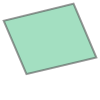

In [20]:
ct_buildings['geometry'][0]

The dataset records over 1 million buildings throughout the state of Connecticut.

In [14]:
len(ct_buildings)

1215624

2. Read the CSV file which contains the mapping of tile names and their train/valid splits. This is not included in the repo and can be downloaded [here](https://figshare.com/articles/dataset/Connecticut_Solar_PV_Semantic_Segmentation_Dataset/18982199?file=33806243) (1.78 KB).

In [21]:
tile_list = pd.read_csv('ct_data/all_ct_labeled/tile_assignments.csv')

In [23]:
tile_list.head()

,tile_name,training_split,density_split
0,975745_sw,train,NaN
1,185895_se,train,NaN
2,205770_ne,train,NaN
3,075860_sw,train,NaN
4,015750_sw,train,NaN


In [28]:
tile_training_split_dict = dict(zip(tile_list['tile_name'], tile_list['training_split']))

3. Read the geospatial records of the boundaries of our manually annotated tiles in Connecticut. This is not included in the repo and can be downloaded [here](https://figshare.com/articles/dataset/Connecticut_Solar_PV_Semantic_Segmentation_Dataset/18982199?file=33904298) (167.96 KB).

In [8]:
ct_labels = gpd.read_file('ct_labeled_tile_boundaries_gcs.geojson')
ct_labels = ct_labels.to_crs('epsg:4326')

In [13]:
ct_labels.head(3)

,GM_LAYER,GM_TYPE,NAME,LAYER,MAP_NAME,FILENAME,DESCRIPTIO,UPPER_LE_X,UPPER_LE_Y,LOWER_RI_X,...,PIXEL_SCAL,TIEPOINTS,MODEL_TYPE,RASTER_TYP,Shape_Leng,Shape_Area,tile_name,housing_units,population,geometry
0,Coverage/Quad,Coverage/Quad,995820_ne.tif,Coverage/Quad,shape-1.shp,S:\0000\TEST\995820_ne.tif,995820_ne.tif,997500.00,825000.00,1000000.00,...,"( 20, 20, 0 )","( 0.00, 0.00, 0.00 ) --> ( 997510.00, 824990.0...",Projection Coordinate System,Pixel is Point,10000.0,6250000.0,995820_ne,718.0,1750.0,"POLYGON ((-72.75916 41.72530, -72.75000 41.725..."
1,Coverage/Quad,Coverage/Quad,990755_nw.tif,Coverage/Quad,shape-1.shp,S:\0000\TEST\990755_nw.tif,990755_nw.tif,990000.00,760000.00,992500.00,...,"( 20, 20, 0 )","( 0.00, 0.00, 0.00 ) --> ( 990010.00, 759990.0...",Projection Coordinate System,Pixel is Point,10000.0,6250000.0,990755_nw,955.0,2540.0,"POLYGON ((-72.78653 41.54691, -72.77740 41.546..."
2,Coverage/Quad,Coverage/Quad,980760_sw.tif,Coverage/Quad,shape-1.shp,S:\0000\TEST\980760_sw.tif,980760_sw.tif,980000.00,762500.00,982500.00,...,"( 20, 20, 0 )","( 0.00, 0.00, 0.00 ) --> ( 980010.00, 762490.0...",Projection Coordinate System,Pixel is Point,10000.0,6250000.0,980760_sw,404.0,810.0,"POLYGON ((-72.82307 41.55375, -72.81394 41.553..."


In [25]:
ct_labels.columns

Index(['GM_LAYER', 'GM_TYPE', 'NAME', 'LAYER', 'MAP_NAME', 'FILENAME',
       'DESCRIPTIO', 'UPPER_LE_X', 'UPPER_LE_Y', 'LOWER_RI_X', 'LOWER_RI_Y',
       'WEST_LONGI', 'NORTH_LATI', 'EAST_LONGI', 'SOUTH_LATI', 'UL_CORNER_',
       'UL_CORNER1', 'UR_CORNER_', 'UR_CORNER1', 'LR_CORNER_', 'LR_CORNER1',
       'LL_CORNER_', 'LL_CORNER1', 'PROJ_DESC', 'PROJ_DATUM', 'PROJ_UNITS',
       'EPSG_CODE', 'COVERED_AR', 'LOAD_TIME', 'NUM_COLUMN', 'NUM_ROWS',
       'NUM_BANDS', 'COLOR_BAND', 'PIXEL_WIDT', 'PIXEL_HEIG', 'BIT_DEPTH',
       'SAMPLE_TYP', 'PCS_CITATI', 'PHOTOMETRI', 'BIT_DEPTH1', 'SAMPLE_FOR',
       'TILE_WIDTH', 'TILE_HEIGH', 'COMPRESSIO', 'PIXEL_SCAL', 'TIEPOINTS',
       'MODEL_TYPE', 'RASTER_TYP', 'Shape_Leng', 'Shape_Area', 'tile_name',
       'housing_units', 'population', 'geometry'],
      dtype='object')

Add a column to the dataframe showing whether a tile is in the training or validation set.

In [29]:
ct_labels['training_split'] = ct_labels['tile_name'].map(tile_training_split_dict)

Select columns useful for this analysis.

In [30]:
ct_labels_skim = ct_labels[['tile_name', 'training_split', 'geometry']]

In [31]:
ct_labels_skim.head()

,tile_name,training_split,geometry
0,995820_ne,valid,"POLYGON ((-72.75916 41.72530, -72.75000 41.725..."
1,990755_nw,valid,"POLYGON ((-72.78653 41.54691, -72.77740 41.546..."
2,980760_sw,train,"POLYGON ((-72.82307 41.55375, -72.81394 41.553..."
3,975745_sw,train,"POLYGON ((-72.84128 41.51257, -72.83215 41.512..."
4,965765_nw,train,"POLYGON ((-72.87792 41.57429, -72.86878 41.574..."


4. Geospatially join the building polygons and tile boundaries, so we can get the buidling polygons within each tile.

In [33]:
buildings_by_tile = gpd.overlay(ct_labels_skim, ct_buildings, how='intersection',)

In [34]:
buildings_by_tile.head()

,tile_name,training_split,release,capture_dates_range,geometry
0,995820_ne,valid,2,7/15/2019-8/29/2019,"POLYGON ((-72.75000 41.72070, -72.75002 41.720..."
1,995820_ne,valid,2,7/15/2019-8/29/2019,"POLYGON ((-72.75000 41.71959, -72.75018 41.719..."
2,995820_ne,valid,2,7/15/2019-8/29/2019,"POLYGON ((-72.75458 41.71916, -72.75458 41.719..."
3,995820_ne,valid,2,7/15/2019-8/29/2019,"POLYGON ((-72.75532 41.72363, -72.75521 41.723..."
4,995820_ne,valid,2,7/15/2019-8/29/2019,"POLYGON ((-72.75620 41.72062, -72.75622 41.720..."


5. Count the number of buildings within each validation tile.

In [36]:
building_counts_by_valid_tile = buildings_by_tile.query('training_split == "valid"')\
    .groupby('tile_name')['geometry'].count()

In [37]:
building_counts_by_valid_tile.head()

tile_name
000795_sw     35
045825_nw    344
080870_nw    250
080905_nw     10
080910_sw     28
Name: geometry, dtype: int64

6. Get the distribution and descriptive statistics of the number of buildings by validation tiles.

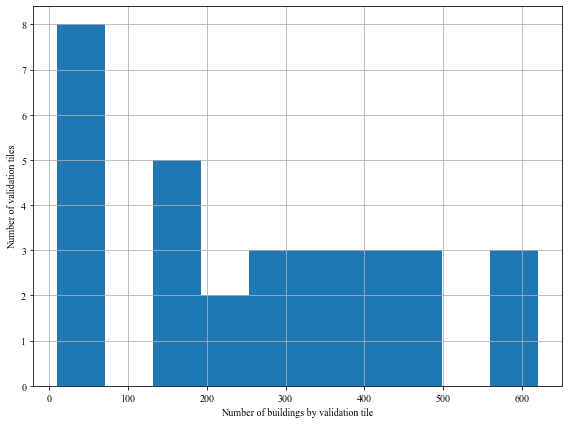

In [44]:
building_counts_by_valid_tile.hist(figsize=(8, 6))
plt.xlabel('Number of buildings by validation tile')
plt.ylabel('Number of validation tiles')
plt.tight_layout()
plt.show()

In [42]:
building_counts_by_valid_tile.describe()

count     30.000000
mean     262.500000
std      188.299605
min       10.000000
25%       86.500000
50%      268.000000
75%      402.000000
max      620.000000
Name: geometry, dtype: float64